In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tools import kaczmarz_method, sparse
from plot_tools import plot_residuals, plot_errors

import warnings
warnings.filterwarnings('ignore')

In [2]:
#@title : Matplotlib configuration

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

SMALL_SIZE = 10 
MEDIUM_SIZE = 12 
BIGGER_SIZE = 14 

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['text.usetex'] = True

# activate latex text rendering
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:
# Fixing random state for reproducibility
np.random.seed(1234)

In [4]:
# Create the toy example

# Run this first part to produce different plots in the paper:
#     (m, n) = (200, 600),  lambda=0.1 for figure 10

m = 200 # number of equation
n = 600 # number of unknown

In [5]:
s = 10  # number of nonzeros in solution

lambda_rsk = 0.01

A = np.random.randn(m,n) 
x_true = sparse(np.random.randn(n,1),s)

noiselev = 0.0

b = A @ x_true

noise = np.random.randn(m,1)
noise = noise/np.linalg.norm(noise)

b_noisy = b + noiselev*noise

print(A.shape, x_true.shape, b.shape, s)

(200, 600) (600, 1) (200, 1) 10


# Effect of $\alpha$ on the convergence

In [6]:
alpha_list = [0.25, 0.5, 1, 2, 4, 8, 16]
eta_alpha = 8

alpha_results = dict()
for alp in alpha_list:
    alpha_results[alp] = dict()

iterations = 1000
for alp in alpha_list:

    W_rska = [alp for _ in range(m)]
    Result = kaczmarz_method(A, b, eta_alpha,  x_true, W_rska, iterations, bN=b_noisy, lbda=0.1)

    alpha_results[alp]['residuals'] = Result[1]
    alpha_results[alp]['errors'] = Result[2]

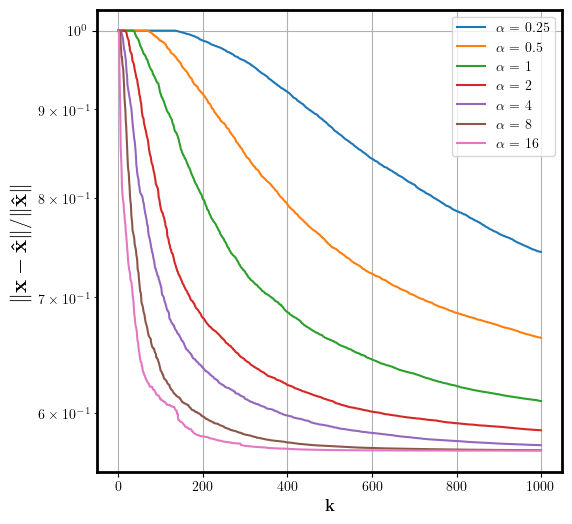

In [7]:
plot_errors(alpha_results, r'$\alpha$')

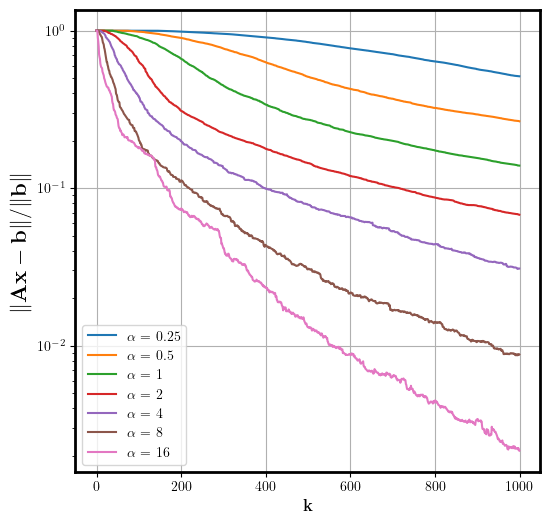

In [8]:
plot_residuals(alpha_results, r'$\alpha$')

# Effect of $\alpha$ in terms of $\eta$ on the convergence

In [9]:
# Create the toy example

# Run this first part to produce different plots in the paper:
#     (m, n) = (100, 10),  lambda=1 for figure 11

m = 100 # number of equation
n = 10 # number of unknown

In [10]:
s = 10  # number of nonzeros in solution

lambda_rsk = 1

A = np.random.randn(m,n) 
x_true = sparse(np.random.randn(n,1),s)

noiselev = 0.0

b = A @ x_true

noise = np.random.randn(m,1)
noise = noise/np.linalg.norm(noise)

b_noisy = b + noiselev*noise

print(A.shape, x_true.shape, b.shape, s)

(100, 10) (10, 1) (100, 1) 10


In [11]:
alpha_stars = []
alpha_lists = []
eta_list = [2, 5, 8, 12]

alpha_list = [0.5*(1 + k) for k in range(24)] 

############################################################
squared_row_norms = np.linalg.norm(A, axis=1) ** 2
Fnorm = squared_row_norms.sum()

_, max_A, _ = np.linalg.svd(A, full_matrices=True)

smax = max_A[0]**2/Fnorm
alpha_stars = [eta_rska/(1 + (eta_rska-1)*smax) for eta_rska in eta_list]

############################################################

alpha_lists = list(np.unique(alpha_list + alpha_stars))

eta_alpha_results = dict()
for thread in eta_list:
    eta_alpha_results[thread] = dict()

iterations = 100
for eta_rska in eta_list:
    residual = []
    error = []
    for alp in alpha_lists:
        W_rska = [alp for _ in range(m)]
        Result = kaczmarz_method(A, b, eta_rska,  x_true, W_rska, iterations, bN=b_noisy, lbda=1)

        residual.append(Result[1][-1])
        error.append(Result[2][-1])

    eta_alpha_results[eta_rska]['residuals'] = residual
    eta_alpha_results[eta_rska]['errors'] = error

# Plot for effect of $\alpha$ in terms of $\eta$

In [12]:
#@title : Plot for effect of $\alpha$ in terms of $\eta$

def plot_residual(results, optimal, range, K):
    plt.figure(figsize=(6,6))
    colors = ['b', 'orange', 'g', 'r']
    X = list(np.unique(range + optimal)) 
    for (i,key) in  enumerate(list(results.keys())):
        idx = X.index(optimal[i])
        plt.scatter(optimal[i], results[key]['residuals'][idx], s=50, marker='o', color=colors[i] )
        plt.plot(X, results[key]['residuals'], label = '{} = {}'.format(K,key), color=colors[i] )

    plt.xlabel(r'$\mathbf{\alpha}$', fontsize=12)
    plt.yscale('log')
    plt.ylim([0, 1])
    plt.ylabel(r'$\mathbf{\|Ax - b\|/\|b\|}$', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_error(results, optimal, range, K):
    plt.figure(figsize=(6,6))
    colors = ['b', 'orange', 'g', 'r']
    X = list(np.unique(range + optimal)) 
    for (i,key) in  enumerate(list(results.keys())):
        idx = X.index(optimal[i])
        plt.scatter(optimal[i], results[key]['errors'][idx], s=50, marker='o', color=colors[i] )
        plt.plot(X, results[key]['errors'], label = '{} = {}'.format(K,key), color=colors[i] )
  
    plt.xlabel(r'$\mathbf{\alpha}$', fontsize=12)
    plt.yscale('log')
    plt.ylim([0, 1])
    plt.ylabel(r'$\mathbf{\|x - \hat x\|/\|\hat x\|}$', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

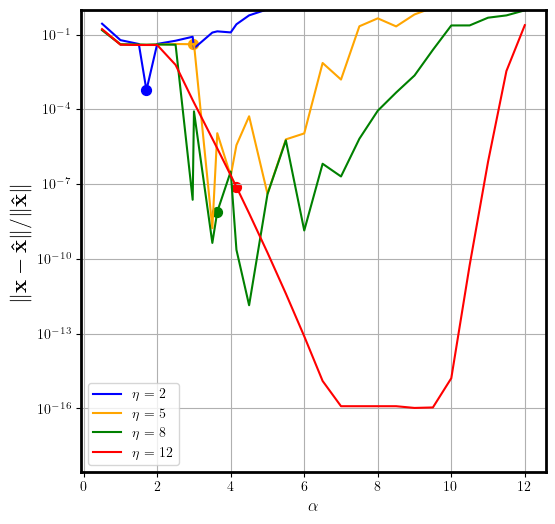

In [13]:
plot_error(eta_alpha_results, alpha_stars, alpha_list, r'$\eta$')

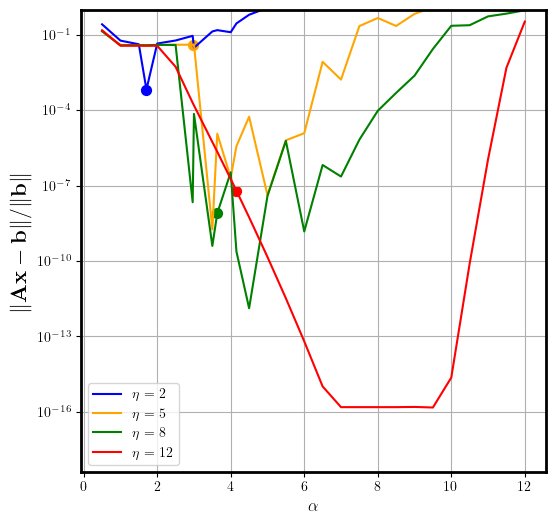

In [14]:
plot_residual(eta_alpha_results, alpha_stars, alpha_list,  r'$\eta$')